# Reionised bubbles around primordial galaxies

## Introduction

This is the first ipython notebook to be followed alongside the background problems in the exercise sheet. The following code only serves as a starting point, feel free to adjust it as you see fit.

## Software requirements

### Option A: Setting up your own python environment

I highly recommend using an [Anaconda environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) to manage your python installation. Having installed [Anaconda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html#), you can create a new environment from the command line by going into this repository's `auxiliary` directory and using the `bubble3.yml` file listing the necessary modules:
```
cd reionised-bubbles-tutorial/auxiliary
conda env create -f bubble3.yml
conda activate bubble3
```
Then, the following commands first confirm which `pip` installation manager is active, among which should be the one from your new Anaconda environment if it has been properly activated, and install the standalone `spectres` module (NB: you may have to change the directory depending on where `anaconda` is installed):
```
which pip3 # check which pip installation manager is active
~/anaconda3/envs/bubble3/bin/pip3 install spectres # you may have to change the conda installation directory
```
Then, you can start up a Jupyter notebook instance with (again checking if it correctly uses your conda environment):
```
which jupyter
jupyter notebook
```

### Option B: Installing requirements in a pre-existing python environment

If you have an existing python environment you would like to use for running the Jupyter notebooks, you can install the necessary dependencies with the `pip` installation manager by going into this repository's `auxiliary` directory and using the `requirements.txt` file listing the required modules (including the standalone `spectres` module):
```
cd reionised-bubbles-tutorial/auxiliary
which pip3 # check which pip installation manager is active
pip3 install -r requirements.txt
```

In [1]:
# Load necessary packages
import numpy as np

import matplotlib
%matplotlib inline
print("Matplotlib", matplotlib.__version__, "(backend: " + matplotlib.get_backend() + ')')
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("ticks")

# Load matplotlib style file
plt.style.use("../auxiliary/bubble.mplstyle")

pformat = ".png"

# Import astropy cosmology, given H0 and Omega_matter (Planck Collaboration 2020)
from astropy.cosmology import FlatLambdaCDM, z_at_value
cosmo = FlatLambdaCDM(H0=67.4, Om0=0.315, Ob0=0.02237/0.674**2, Tcmb0=2.726)

# Physical constants and unit conversions
from astropy.constants import h, c, sigma_sb, L_sun
from astropy import units

Matplotlib 3.10.0 (backend: inline)


## Exercises: calculation templates

In [2]:
# Problem 1.1: Rydberg constant
E_n = lambda n: -13.6/n**2 # energy of level n in eV
R_H = (-E_n(1) * units.eV / (h * c)).to("1/Angstrom").value # Rydberg constant in 1/Angstrom
print("The Rydberg constant is R_H = {:.5f} Å^-1".format(R_H))

The Rydberg constant is R_H = 0.00110 Å^-1


The wavelengths of hydrogen electronic transitions:
2 -> 1: 1215.53 Å
3 -> 2: 6563.87 Å
4 -> 3: 18753.91 Å


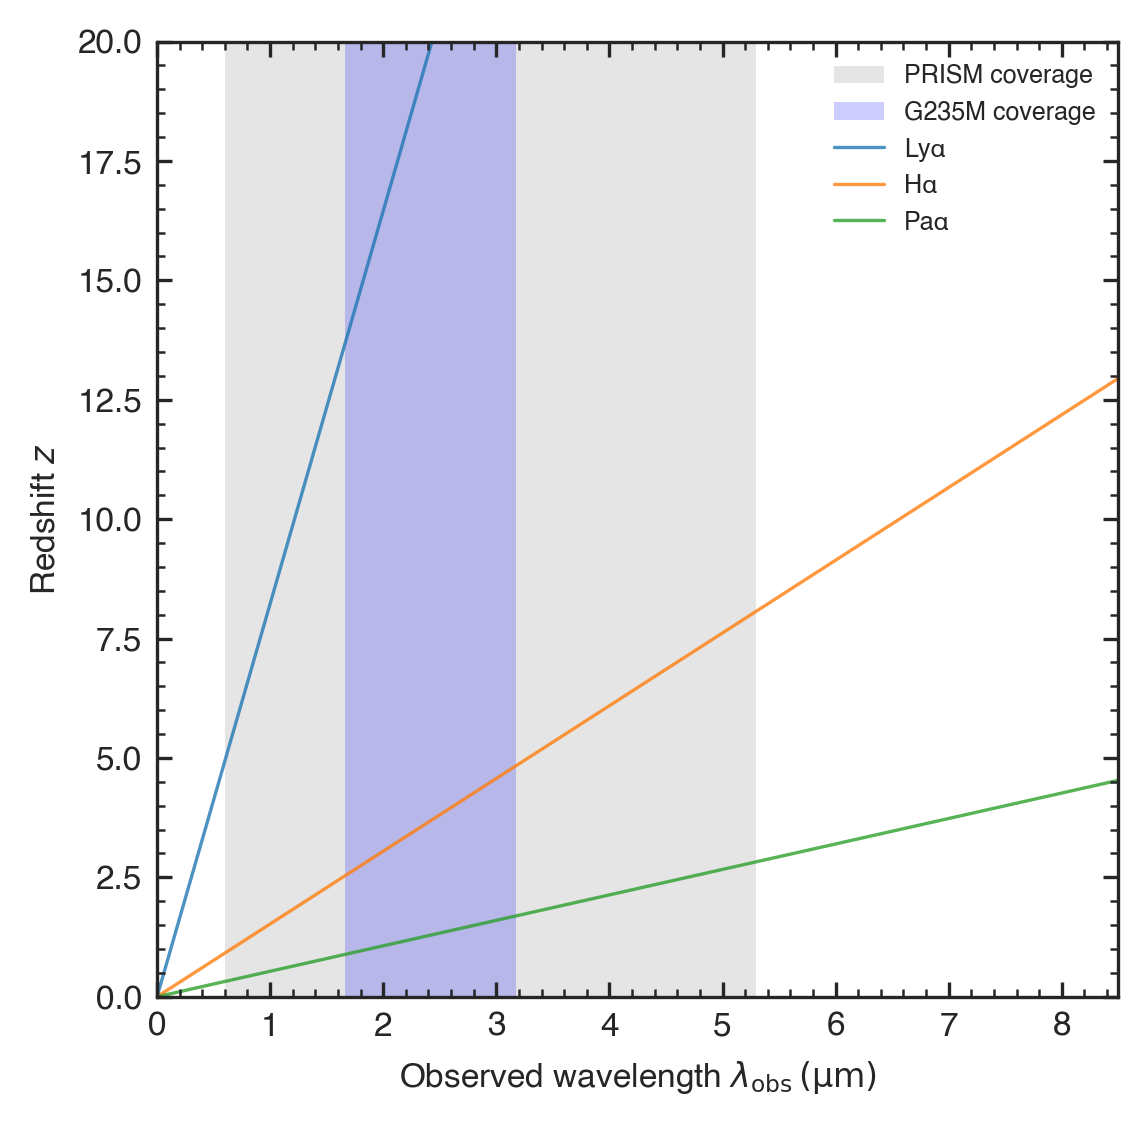

In [3]:
# Problem 1.2a-b: wavelengths of Lyα, Hα, Paα and their redshift coverage by JWST/NIRSpec
fig, ax = plt.subplots(figsize=(8.27/2, 8.27/2))
z = np.linspace(0, 20, 100)

wavelength_coverage_PRISM = [0.6, 5.3]
wavelength_coverage_G235M = [1.66, 3.17]

ax.fill_between(wavelength_coverage_PRISM, y1=0, y2=1, transform=ax.get_xaxis_transform(), edgecolor="None", facecolor="grey", alpha=0.2, label="PRISM coverage")
ax.fill_between(wavelength_coverage_G235M, y1=0, y2=1, transform=ax.get_xaxis_transform(), edgecolor="None", facecolor="b", alpha=0.2, label="G235M coverage")

line_labels = {"Lyα": r"$\mathrm{Ly\alpha}$", "Hα": r"$\mathrm{H\alpha}$", "Paα": r"$\mathrm{Pa\alpha}$"}
print("The wavelengths of hydrogen electronic transitions:")
for i, line_label in enumerate(line_labels):
    n = i + 1
    wl = 1.0 / (R_H * (1/n**2 - 1/(n+1)**2))
    print("{:d} -> {:d}: {:.2f} Å".format(n+1, n, wl))
    if n == 1: wl_Lya = wl
    
    ax.plot(z * wl * 1e-4, z, alpha=0.8, label=line_label)

ax.set_xlabel(r"Observed wavelength $\lambda_\mathrm{obs} \, (\mathrm{\mu m})$")
ax.set_ylabel(r"Redshift $z$")

ax.set_xlim(0.0, 8.5)
ax.set_ylim(0, 20)

ax.legend(frameon=False)

plt.show()

In [4]:
# Problem 1.4a: Strömgren radius of H II region
temperatures = np.arange(1e4, 4e4, 1e4) # electron temperatures in K
dN_ion_dt = 1e49 # ionizing photon rate in s^-1
n_H = 300.0 # hydrogen number density in cm^-3
alpha_rec = lambda T: 2.54e-13 * (T/1e4)**-0.8 # recombination coefficient in cm^3 s^-1

print("Strömgren radius around the star for a range of electron temperatures:")
for T in temperatures:
    R_S = (((3.0 * dN_ion_dt)/(4.0 * np.pi * alpha_rec(T) * n_H**2))**(1.0/3.0) * units.cm).to("pc").value # Strömgren radius in parsec
    print("For T = {:.1f} x 10^4 K, R_S = {:.2f} parsec, so the cloud would be {} bounded".format(T/1e4, R_S, "density" if 2*R_S > 4.0 else "ionisation"))

Strömgren radius around the star for a range of electron temperatures:
For T = 1.0 x 10^4 K, R_S = 1.53 parsec, so the cloud would be ionisation bounded
For T = 2.0 x 10^4 K, R_S = 1.84 parsec, so the cloud would be ionisation bounded
For T = 3.0 x 10^4 K, R_S = 2.05 parsec, so the cloud would be density bounded


In [5]:
# Problem 1.4b: Lyα luminosity of H II region
E_Lya = (h * c / (wl_Lya * units.Angstrom)).to("erg").value # Lyα photon energy in erg

dNdt_Lya = 2.0/3.0 * dN_ion_dt # Lyα emission rate in Hz
L_Lya = dNdt_Lya * E_Lya # Lyα luminosity in erg/s
logL_Lya = int(np.log10(L_Lya))

T_star = 40000.0 # stellar temperature in K
R_star = (10.0 * units.R_sun) # stellar radius in cm
L_star = (sigma_sb * (T_star * units.K)**4 * 4.0 * np.pi * R_star**2).to("erg/s").value # stellar luminosity in erg/s

print("The Lyα emission rate in the H II region is {:.2f} x 10^48 per second".format(dNdt_Lya/1e48))
print("This results in a luminosity of L_Lyα = {:.2f} x 10^{:d} erg/s or {:.2f} L_sun,".format(L_Lya/10**logL_Lya, logL_Lya, L_Lya/L_sun.to("erg/s").value))
print("which is {:.1f}% of the luminosity of the central star (L_* = {:.2f} L_sun)".format(L_Lya/L_star*100.0, L_star/L_sun.to("erg/s").value))

The Lyα emission rate in the H II region is 6.67 x 10^48 per second
This results in a luminosity of L_Lyα = 1.09 x 10^38 erg/s or 28460.82 L_sun,
which is 12.3% of the luminosity of the central star (L_* = 230639.48 L_sun)


In [6]:
# Problem 2.1a: cosmic expansion of an ionised bubble
z = 7.0
print("At z = {:.1f}, the e-folding time is {:.1f},".format(z, 1.0 / (cosmo.H(z).to("1/Myr"))), end=' ')
print("while the age of the Universe is {:.1f}".format(cosmo.age(z).to("Myr")))

At z = 7.0, the e-folding time is 1138.6 Myr, while the age of the Universe is 758.5 Myr


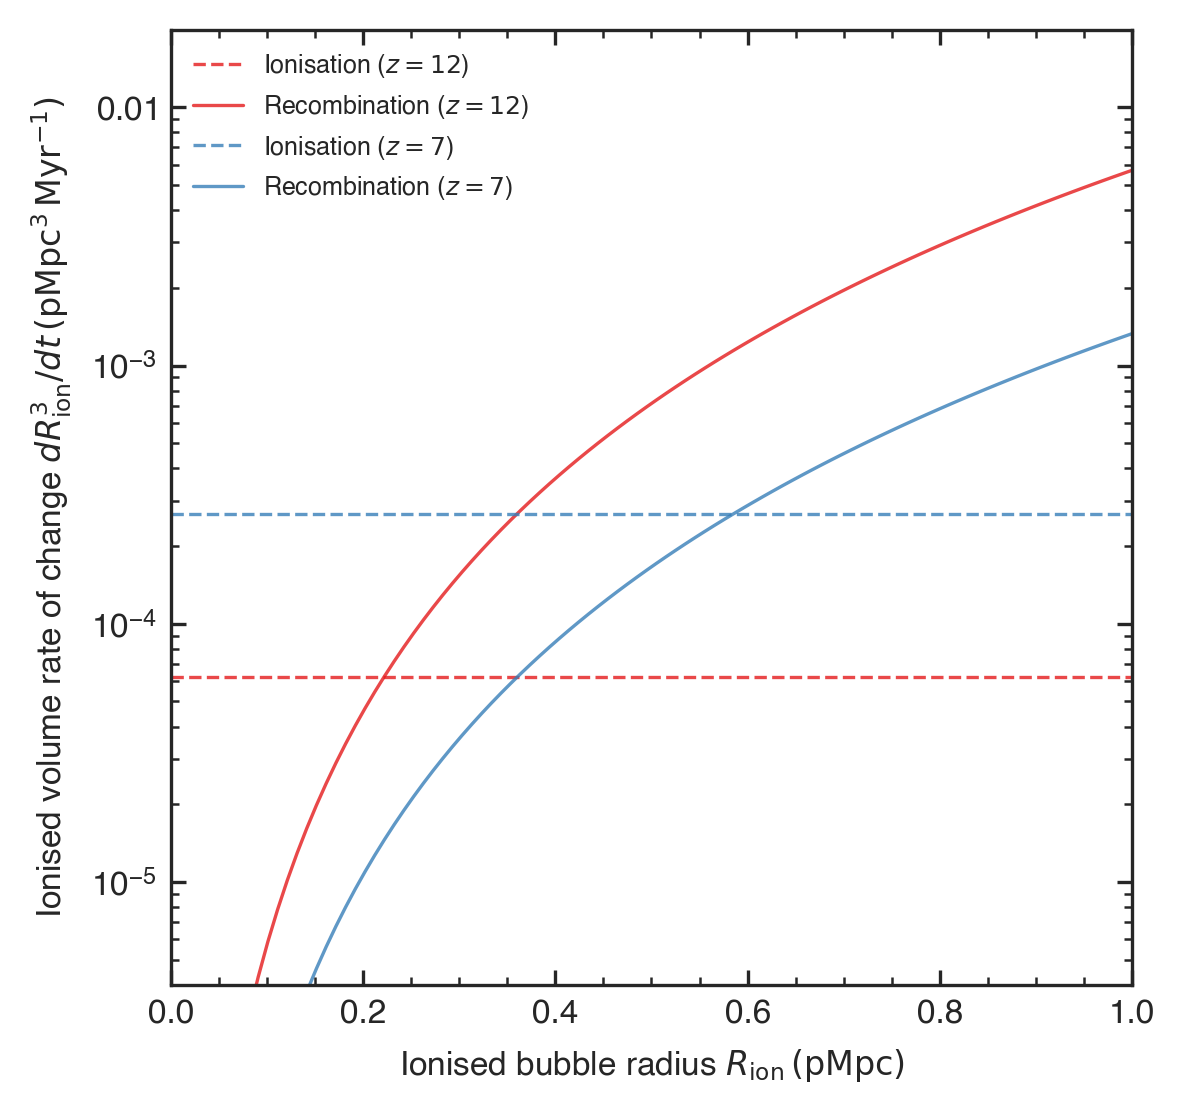

In [7]:
# Problem 2.1c: ionisations and recombinations inside an ionised bubble
dN_ion_dt_Myr = (1e54 * units.Hz).to("1/Myr").value # ionizing photon rate from 1/s to 1/Myr
f_escLyC = 0.1 # escape fraction of Lyman-continuum photons
n_H_0 = 1.88e-7 # hydrogen number density at z = 0 in cm^-3

C_HII = 3.0 # clumping factor
alpha_rec_IGM = (alpha_rec(20000.0) * units.cm**3 / units.s).to("Mpc^3/Myr").value # recombination rate in Mpc^3 Myr^-1

fig, ax = plt.subplots(figsize=(8.27/2, 8.27/2))
R_ion = np.linspace(0, 1, 100)

colors1 = sns.color_palette("Set1", 9)

for z, c in zip([12, 7], colors1):
    # Mean hydrogen number density at redshift z (converted to Mpc^-3)
    n_H = (n_H_0 * (1.0 + z)**3 * units.cm**-3).to("Mpc^-3").value
    ax.axhline(y=3.0 * f_escLyC * dN_ion_dt_Myr / (4.0 * np.pi * n_H), linestyle='--', color=c, alpha=0.8, label=r"Ionisation ($z = {:.0f}$)".format(z))
    ax.plot(R_ion, C_HII * n_H * alpha_rec_IGM * R_ion**3, color=c, alpha=0.8, label=r"Recombination ($z = {:.0f}$)".format(z))

ax.set_xlabel(r"Ionised bubble radius $R_\mathrm{ion} \, (\mathrm{pMpc})$")
ax.set_ylabel(r"Ionised volume rate of change $dR_\mathrm{ion}^3/dt \, (\mathrm{pMpc^3 \, Myr^{-1}})$")

ax.set_xlim(0.0, 1.0)
ax.set_ylim(4e-6, 0.02)

ax.set_yscale("log")

ax.legend(frameon=False)

plt.show()